In [2]:
#dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

#data files
PPP_dataFile = "PPP Data/PPP Data 150k GA.csv"

#read the data
PPP_data = pd.read_csv(PPP_dataFile)
PPP_data.head()

,Loan Amount,City,State,Zip,NAICSCode,BusinessType,RaceEthnicity,Gender,Veteran,NonProfit,JobsRetained,DateApproved,Lender,CD
0,"$149,998.30",DECATUR,GA,30033,621210.0,Limited Liability Company(LLC),Unanswered,Male Owned,Unanswered,NaN,14.0,4/14/2020,Newton Federal Bank,GA - 04
1,"$149,981.92",BLACKSHEAR,GA,31516,713910.0,Non-Profit Organization,White,Male Owned,Unanswered,Y,32.0,4/28/2020,Primesouth Bank,GA - 01
2,"$149,952.00",ELLENWOOD,GA,30294,812199.0,Limited Liability Company(LLC),Unanswered,Unanswered,Unanswered,NaN,14.0,6/18/2020,WebBank,GA - 04
3,"$149,952.00",DECATUR,GA,30034,484121.0,Limited Liability Company(LLC),Unanswered,Unanswered,Unanswered,NaN,11.0,6/20/2020,WebBank,GA - 04
4,"$149,924.00",ATLANTA,GA,30338,339116.0,Corporation,Unanswered,Unanswered,Unanswered,NaN,0.0,4/29/2020,"Wells Fargo Bank, National Association",GA - 06


In [9]:
#fix the spelling of a header
PPP_data.rename(columns = {" LoanAmount ":"Loan Amount"}, inplace=True)
PPP_data.head()

,Loan Amount,City,State,Zip,NAICSCode,BusinessType,RaceEthnicity,Gender,Veteran,NonProfit,JobsRetained,DateApproved,Lender,CD
0,"$149,998.30",DECATUR,GA,30033,621210.0,Limited Liability Company(LLC),Unanswered,Male Owned,Unanswered,NaN,14.0,4/14/2020,Newton Federal Bank,GA - 04
1,"$149,981.92",BLACKSHEAR,GA,31516,713910.0,Non-Profit Organization,White,Male Owned,Unanswered,Y,32.0,4/28/2020,Primesouth Bank,GA - 01
2,"$149,952.00",ELLENWOOD,GA,30294,812199.0,Limited Liability Company(LLC),Unanswered,Unanswered,Unanswered,NaN,14.0,6/18/2020,WebBank,GA - 04
3,"$149,952.00",DECATUR,GA,30034,484121.0,Limited Liability Company(LLC),Unanswered,Unanswered,Unanswered,NaN,11.0,6/20/2020,WebBank,GA - 04
4,"$149,924.00",ATLANTA,GA,30338,339116.0,Corporation,Unanswered,Unanswered,Unanswered,NaN,0.0,4/29/2020,"Wells Fargo Bank, National Association",GA - 06


In [17]:
#function to clean up extraneous data in the Loan Amount column
def elises_func(stringy):
        our_float = stringy.replace("   ","").replace("  ","").replace(" ","").replace(",","").replace("$","").replace("-","")
        if not our_float:
            our_float = 0
        else:
            our_float = float(our_float)
        return our_float

In [18]:
#applying the clean-up function
PPP_data["Loan Amount"] = PPP_data["Loan Amount"].apply(elises_func)
PPP_data.head()

KeyError: 'Loan Amount'

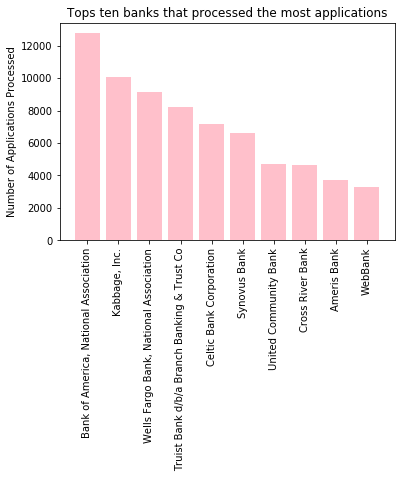

<Figure size 432x288 with 0 Axes>

In [14]:
banks_most_loans=PPP_data["Lender"].value_counts()
number_of_applications=PPP_data.groupby("Lender").nunique()
#averageLoanAmount=PPP_data.groupby('Lender').mean()["Loan Amount"]
#averageJobsRetained=PPP_data.groupby('Lender').mean()['JobsRetained']
# print(averageLoanAmount)
# print(averageJobsRetained)
# banks_most_loans.head()
# Create bins in which to place values based upon Loan Amounts
bins = [0, 25000, 50000, 75000, 100000, 125000, 150000]
# Create labels for these bins
labels = ["<$25K", "\\$25K-\\$50K","\\$50K-\\$75K", "\\$75K-\\$100K","\\$100K-\\$125K", "\\$125K-\\$150K"]
top_ten_banks=banks_most_loans.head(10)
#top_ten_applictions=banks_that_loaned.head(10)
top_ten_banks_df=pd.DataFrame(top_ten_banks)
top_ten_banks_df
x=top_ten_banks_df.index
y=top_ten_banks_df["Lender"]
plt.bar(x,y, color='pink')
plt.xticks(x, rotation="vertical")
plt.title("Tops ten banks that processed the most applications")
plt.ylabel("Number of Applications Processed")

plt.show()
plt.tight_layout()

In [9]:
# Slice the data and place it into bins
LoanAmount_s = pd.cut(PPP_data["Loan Amount"], bins, labels=labels)

In [10]:
# Place the data series into a new column inside of the DataFrame
PPP_data["Group of Loan Amounts"] = LoanAmount_s
PPP_data

,Loan Amount,City,State,Zip,NAICSCode,BusinessType,RaceEthnicity,Gender,Veteran,NonProfit,JobsRetained,DateApproved,Lender,CD,Group of Loan Amounts
0,149998.30,DECATUR,GA,30033,621210.0,Limited Liability Company(LLC),Unanswered,Male Owned,Unanswered,None,14.0,4/14/2020,Newton Federal Bank,GA - 04,\$125K-\$150K
1,149981.92,BLACKSHEAR,GA,31516,713910.0,Non-Profit Organization,White,Male Owned,Unanswered,Y,32.0,4/28/2020,Primesouth Bank,GA - 01,\$125K-\$150K
2,149952.00,ELLENWOOD,GA,30294,812199.0,Limited Liability Company(LLC),Unanswered,Unanswered,Unanswered,None,14.0,6/18/2020,WebBank,GA - 04,\$125K-\$150K
3,149952.00,DECATUR,GA,30034,484121.0,Limited Liability Company(LLC),Unanswered,Unanswered,Unanswered,None,11.0,6/20/2020,WebBank,GA - 04,\$125K-\$150K
4,149924.00,ATLANTA,GA,30338,339116.0,Corporation,Unanswered,Unanswered,Unanswered,None,0.0,4/29/2020,"Wells Fargo Bank, National Association",GA - 06,\$125K-\$150K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138514,2.00,MARIETTA,GA,30067,445110.0,Limited Liability Company(LLC),Unanswered,Unanswered,Unanswered,None,5.0,4/30/2020,"Bank of America, National Association",GA - 06,<$25K
138515,1.00,ATLANTA,GA,30339,236115.0,Limited Liability Company(LLC),Unanswered,Unanswered,Unanswered,None,1.0,5/29/2020,"Bank of America, National Association",GA - 06,<$25K
138516,1.00,SAVANNAH,GA,31415,485119.0,Sole Proprietorship,Unanswered,Unanswered,Unanswered,None,0.0,5/15/2020,"Wells Fargo Bank, National Association",GA - 01,<$25K
138517,0.00,GAINESVILLE,GA,30504,561990.0,Corporation,Unanswered,Unanswered,Unanswered,None,2.0,5/3/2020,"Bank of America, National Association",GA - 09,NaN


In [11]:
top_job_retainers=PPP_data.sort_values("JobsRetained",ascending=False)

top_ten_job_retainers=top_job_retainers.head(10)

top_ten_job_retainers

,Loan Amount,City,State,Zip,NAICSCode,BusinessType,RaceEthnicity,Gender,Veteran,NonProfit,JobsRetained,DateApproved,Lender,CD,Group of Loan Amounts
16309,75000.00,ALBANY,GA,31707,812990.0,Sole Proprietorship,Unanswered,Male Owned,Non-Veteran,None,500.0,4/15/2020,"Readycap Lending, LLC",GA - 02,\$50K-\$75K
103112,9500.00,STONE MOUNTAIN,GA,30083,611430.0,Corporation,Unanswered,Unanswered,Unanswered,None,500.0,5/14/2020,"Bank of America, National Association",GA - 04,<$25K
115907,6250.00,AUGUSTA,GA,30815,811111.0,Sole Proprietorship,Unanswered,Unanswered,Unanswered,None,500.0,6/15/2020,Celtic Bank Corporation,GA - 12,<$25K
74044,18962.00,ATLANTA,GA,30331,444110.0,Sole Proprietorship,Unanswered,Unanswered,Unanswered,None,500.0,5/3/2020,"Bank of America, National Association",GA - 05,<$25K
53684,24877.00,DULUTH,GA,30096,722513.0,Corporation,Unanswered,Unanswered,Unanswered,None,500.0,5/11/2020,"Bank of America, National Association",GA - 07,<$25K
54123,24500.00,DECATUR,GA,30030,811219.0,Limited Liability Company(LLC),Unanswered,Unanswered,Unanswered,None,500.0,4/29/2020,Celtic Bank Corporation,GA - 04,<$25K
126435,3790.00,ATLANTA,GA,30344,485320.0,Subchapter S Corporation,Unanswered,Unanswered,Unanswered,None,500.0,5/7/2020,Celtic Bank Corporation,GA - 05,<$25K
126596,3750.00,SUWANEE,GA,30024,711510.0,Limited Liability Company(LLC),Unanswered,Unanswered,Unanswered,None,500.0,5/6/2020,"Bank of America, National Association",GA - 06,<$25K
115604,6270.00,THOMASTON,GA,30286,447110.0,Corporation,Unanswered,Unanswered,Unanswered,None,500.0,5/2/2020,"Kabbage, Inc.",GA - 03,<$25K
98883,10497.09,NORCROSS,GA,30093,524210.0,Limited Liability Company(LLC),Unanswered,Unanswered,Unanswered,None,500.0,5/12/2020,Celtic Bank Corporation,GA - 04,<$25K


In [12]:
PPP_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138519 entries, 0 to 138518
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   Loan Amount            138519 non-null  float64 
 1   City                   138519 non-null  object  
 2   State                  138519 non-null  object  
 3   Zip                    138519 non-null  int64   
 4   NAICSCode              138519 non-null  float64 
 5   BusinessType           138486 non-null  object  
 6   RaceEthnicity          138519 non-null  object  
 7   Gender                 138519 non-null  object  
 8   Veteran                138519 non-null  object  
 9   NonProfit              3832 non-null    object  
 10  JobsRetained           138519 non-null  float64 
 11  DateApproved           138519 non-null  object  
 12  Lender                 138519 non-null  object  
 13  CD                     138519 non-null  object  
 14  Group of Loan Amount

In [13]:
#for companies that reported some jobs
clean_job_retainers = PPP_data[PPP_data["JobsRetained"] >= 0]
clean_job_retainers["JobsRetained"].value_counts()
sorted_clean_jobs = clean_job_retainers.sort_values(by="JobsRetained",ascending=True)
sorted_clean_jobs
# one_job_saved_df = sorted_clean_jobs[sorted_clean_jobs["JobsRetained"] == 1]
# one_job_saved_df

#plt.scatter(PPP_data['Loan Amount'],clean_job_retainers)
#plt.xticks(PPP_data['Loan Amount'], rotation="vertical")
# one_job_saved_df.sort_values("Loan Amount", ascending=False).head(25)

,Loan Amount,City,State,Zip,NAICSCode,BusinessType,RaceEthnicity,Gender,Veteran,NonProfit,JobsRetained,DateApproved,Lender,CD,Group of Loan Amounts
52243,25625.00,ATLANTA,GA,30349,551112.0,Limited Liability Company(LLC),Unanswered,Female Owned,Non-Veteran,None,0.0,5/3/2020,Cross River Bank,GA - 05,\$25K-\$50K
70458,20118.00,STOCKBRIDGE,GA,30281,541990.0,Sole Proprietorship,Unanswered,Unanswered,Unanswered,None,0.0,6/29/2020,Cross River Bank,GA - 04,<$25K
105121,8941.67,ELBERTON,GA,30635,112320.0,Self-Employed Individuals,Unanswered,Unanswered,Unanswered,None,0.0,5/1/2020,Pinnacle Bank,GA - 09,<$25K
70457,20118.00,MCDONOUGH,GA,30252,541990.0,Sole Proprietorship,Unanswered,Unanswered,Unanswered,None,0.0,6/29/2020,Cross River Bank,GA - 03,<$25K
105124,8940.00,MARIETTA,GA,30062,531210.0,Self-Employed Individuals,Unanswered,Unanswered,Unanswered,None,0.0,4/29/2020,IBERIABANK,GA - 06,<$25K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98547,10583.00,ALPHARETTA,GA,30004,722513.0,Sole Proprietorship,Unanswered,Male Owned,Non-Veteran,None,500.0,6/10/2020,"Bank of America, National Association",GA - 06,<$25K
45702,30672.50,ALPHARETTA,GA,30005,561910.0,Sole Proprietorship,Unanswered,Unanswered,Unanswered,None,500.0,4/15/2020,Fifth Third Bank,GA - 06,\$25K-\$50K
119305,5416.67,NORCOSS,GA,30019,722515.0,Corporation,Unanswered,Unanswered,Unanswered,None,500.0,5/5/2020,Celtic Bank Corporation,GA - 07,<$25K
137550,1000.00,PORTWENWORTH,GA,31407,485310.0,Sole Proprietorship,Unanswered,Unanswered,Unanswered,None,500.0,6/16/2020,Celtic Bank Corporation,GA - 01,<$25K


In [14]:
worst_job_retainers=PPP_data.sort_values("JobsRetained",ascending=True)
worst_job_retainers

,Loan Amount,City,State,Zip,NAICSCode,BusinessType,RaceEthnicity,Gender,Veteran,NonProfit,JobsRetained,DateApproved,Lender,CD,Group of Loan Amounts
101089,10000.00,DOUGLASVILLE,GA,30135,722513.0,Corporation,Unanswered,Unanswered,Unanswered,None,-9.223372e+18,5/3/2020,"Wells Fargo Bank, National Association",GA - 03,<$25K
87108,14098.00,ROSWELL,GA,30075,531210.0,Limited Liability Company(LLC),Unanswered,Unanswered,Unanswered,None,-9.223372e+18,5/3/2020,"Wells Fargo Bank, National Association",GA - 06,<$25K
102680,9628.00,DOUGLASVILLE,GA,30135,812112.0,Corporation,Unanswered,Unanswered,Unanswered,None,-9.223372e+18,5/3/2020,"Wells Fargo Bank, National Association",GA - 03,<$25K
87107,14098.97,MONROE,GA,30656,517919.0,Subchapter S Corporation,Unanswered,Unanswered,Unanswered,None,-9.223372e+18,4/28/2020,Pinnacle Bank,GA - 10,<$25K
102681,9628.00,JOHNS CREEK,GA,30022,236220.0,Corporation,Unanswered,Unanswered,Unanswered,None,-9.223372e+18,5/3/2020,"Wells Fargo Bank, National Association",GA - 06,<$25K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115907,6250.00,AUGUSTA,GA,30815,811111.0,Sole Proprietorship,Unanswered,Unanswered,Unanswered,None,5.000000e+02,6/15/2020,Celtic Bank Corporation,GA - 12,<$25K
115604,6270.00,THOMASTON,GA,30286,447110.0,Corporation,Unanswered,Unanswered,Unanswered,None,5.000000e+02,5/2/2020,"Kabbage, Inc.",GA - 03,<$25K
126435,3790.00,ATLANTA,GA,30344,485320.0,Subchapter S Corporation,Unanswered,Unanswered,Unanswered,None,5.000000e+02,5/7/2020,Celtic Bank Corporation,GA - 05,<$25K
118398,5655.00,SNELLVILLE,GA,30039,488999.0,Limited Liability Company(LLC),Unanswered,Unanswered,Unanswered,None,5.000000e+02,5/5/2020,"Bank of America, National Association",GA - 04,<$25K


In [15]:
average_for_loanamt=clean_job_retainers.groupby("Group of Loan Amounts").mean()
average_for_loanamt

,Loan Amount,Zip,NAICSCode,JobsRetained
Group of Loan Amounts,,,,
<$25K,11915.500147,30574.709751,-1.556003e+17,2.240081
\$25K-\$50K,36049.358365,30627.516561,-1.089917e+17,5.542919
\$50K-\$75K,61634.434571,30630.832470,-8.462528e+16,8.581769
\$75K-\$100K,86890.790513,30603.098781,-8.433674e+16,11.260876
\$100K-\$125K,111933.521717,30581.581174,-6.502066e+16,13.818163
\$125K-\$150K,136676.526865,30569.906202,-5.691683e+16,16.678803


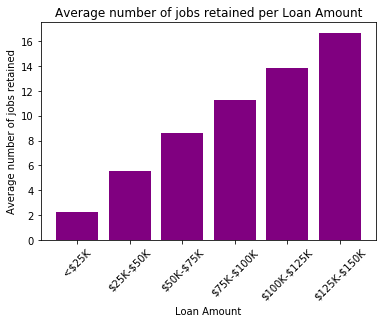

In [21]:
x=average_for_loanamt.index
y=average_for_loanamt["JobsRetained"]
plt.bar(x,y, color='purple')
plt.xticks(x, rotation=45)
plt.title("Average number of jobs retained per Loan Amount")
plt.ylabel("Average number of jobs retained")
plt.xlabel("Loan Amount")
plt.show()